The code is written to plot the acceleration-velocity profile relationship, comparing synchronization and non-synchronization control algorithms in a 4-DOF Cartesian robot analysis.

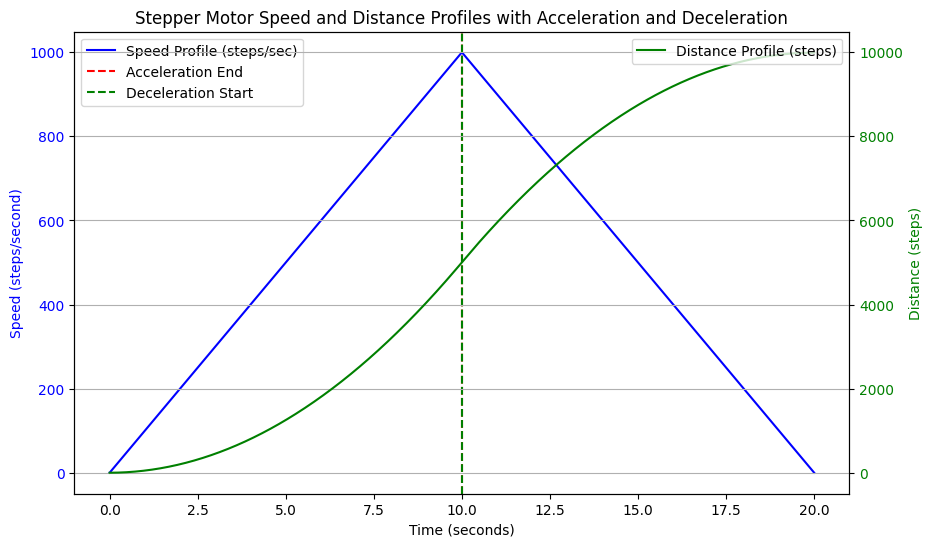

Acceleration Time: 10.00 seconds
Deceleration Time: 10.00 seconds
Time at Max Speed: 0.00 seconds
Total Time: 20.00 seconds
Distance during Acceleration: 5000.00 steps
Distance during Deceleration: 5000.00 steps
Distance at Max Speed: -5000.00 steps


In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the simulation
max_steps = 5000  # Total steps the motor needs to travel
acceleration = 100  # Acceleration in steps/s^2
deceleration = 100  # Deceleration in steps/s^2
max_speed = 1000  # Maximum steps per second (maximum frequency)
total_time = 0  # To be calculated later

# Calculate time to reach max speed using acceleration (t = v / a)
acceleration_time = max_speed / acceleration  # Time to reach max speed
deceleration_time = max_speed / deceleration  # Time to decelerate to zero

# Total time is the time to accelerate, time at max speed, and time to decelerate
distance_acceleration = 0.5 * acceleration * (acceleration_time ** 2)  # Distance covered during acceleration
distance_deceleration = 0.5 * deceleration * (deceleration_time ** 2)  # Distance covered during deceleration
distance_max_speed = max_steps - distance_acceleration - distance_deceleration  # Remaining distance at max speed

if distance_max_speed < 0:
    # If the total distance is too small for max speed, adjust acceleration and deceleration times
    acceleration_time = np.sqrt(max_steps / (0.5 * acceleration))
    deceleration_time = acceleration_time
    total_time = 2 * acceleration_time  # Total time will be just acceleration and deceleration time
    max_speed_time = 0  # No time spent at max speed
else:
    max_speed_time = distance_max_speed / max_speed  # Time at max speed
    total_time = acceleration_time + max_speed_time + deceleration_time

# Time array for the simulation
time = np.linspace(0, total_time, 1000)

# Initialize speed profile (steps per second)
speed_profile = np.zeros_like(time)

# Acceleration phase
speed_profile[time <= acceleration_time] = acceleration * time[time <= acceleration_time]

# Constant speed phase
speed_profile[(time > acceleration_time) & (time < (total_time - deceleration_time))] = max_speed

# Deceleration phase
speed_profile[time >= (total_time - deceleration_time)] = max_speed - deceleration * (time[time >= (total_time - deceleration_time)] - (total_time - deceleration_time))

# Calculate distance profile (cumulative distance)
distance_profile = np.cumsum(speed_profile) * (total_time / len(time))

# Plotting the profiles
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot speed profile
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Speed (steps/second)', color='b')
ax1.plot(time, speed_profile, label="Speed Profile (steps/sec)", color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Plot distance profile
ax2 = ax1.twinx()
ax2.set_ylabel('Distance (steps)', color='g')
ax2.plot(time, distance_profile, label="Distance Profile (steps)", color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Adding vertical lines for phases
ax1.axvline(acceleration_time, color="r", linestyle="--", label="Acceleration End")
ax1.axvline(total_time - deceleration_time, color="g", linestyle="--", label="Deceleration Start")

# Titles and labels
plt.title("Stepper Motor Speed and Distance Profiles with Acceleration and Deceleration")
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid(True)
plt.show()

# Output the calculated times and distances
print(f"Acceleration Time: {acceleration_time:.2f} seconds")
print(f"Deceleration Time: {deceleration_time:.2f} seconds")
print(f"Time at Max Speed: {max_speed_time:.2f} seconds")
print(f"Total Time: {total_time:.2f} seconds")
print(f"Distance during Acceleration: {distance_acceleration:.2f} steps")
print(f"Distance during Deceleration: {distance_deceleration:.2f} steps")
print(f"Distance at Max Speed: {distance_max_speed:.2f} steps")


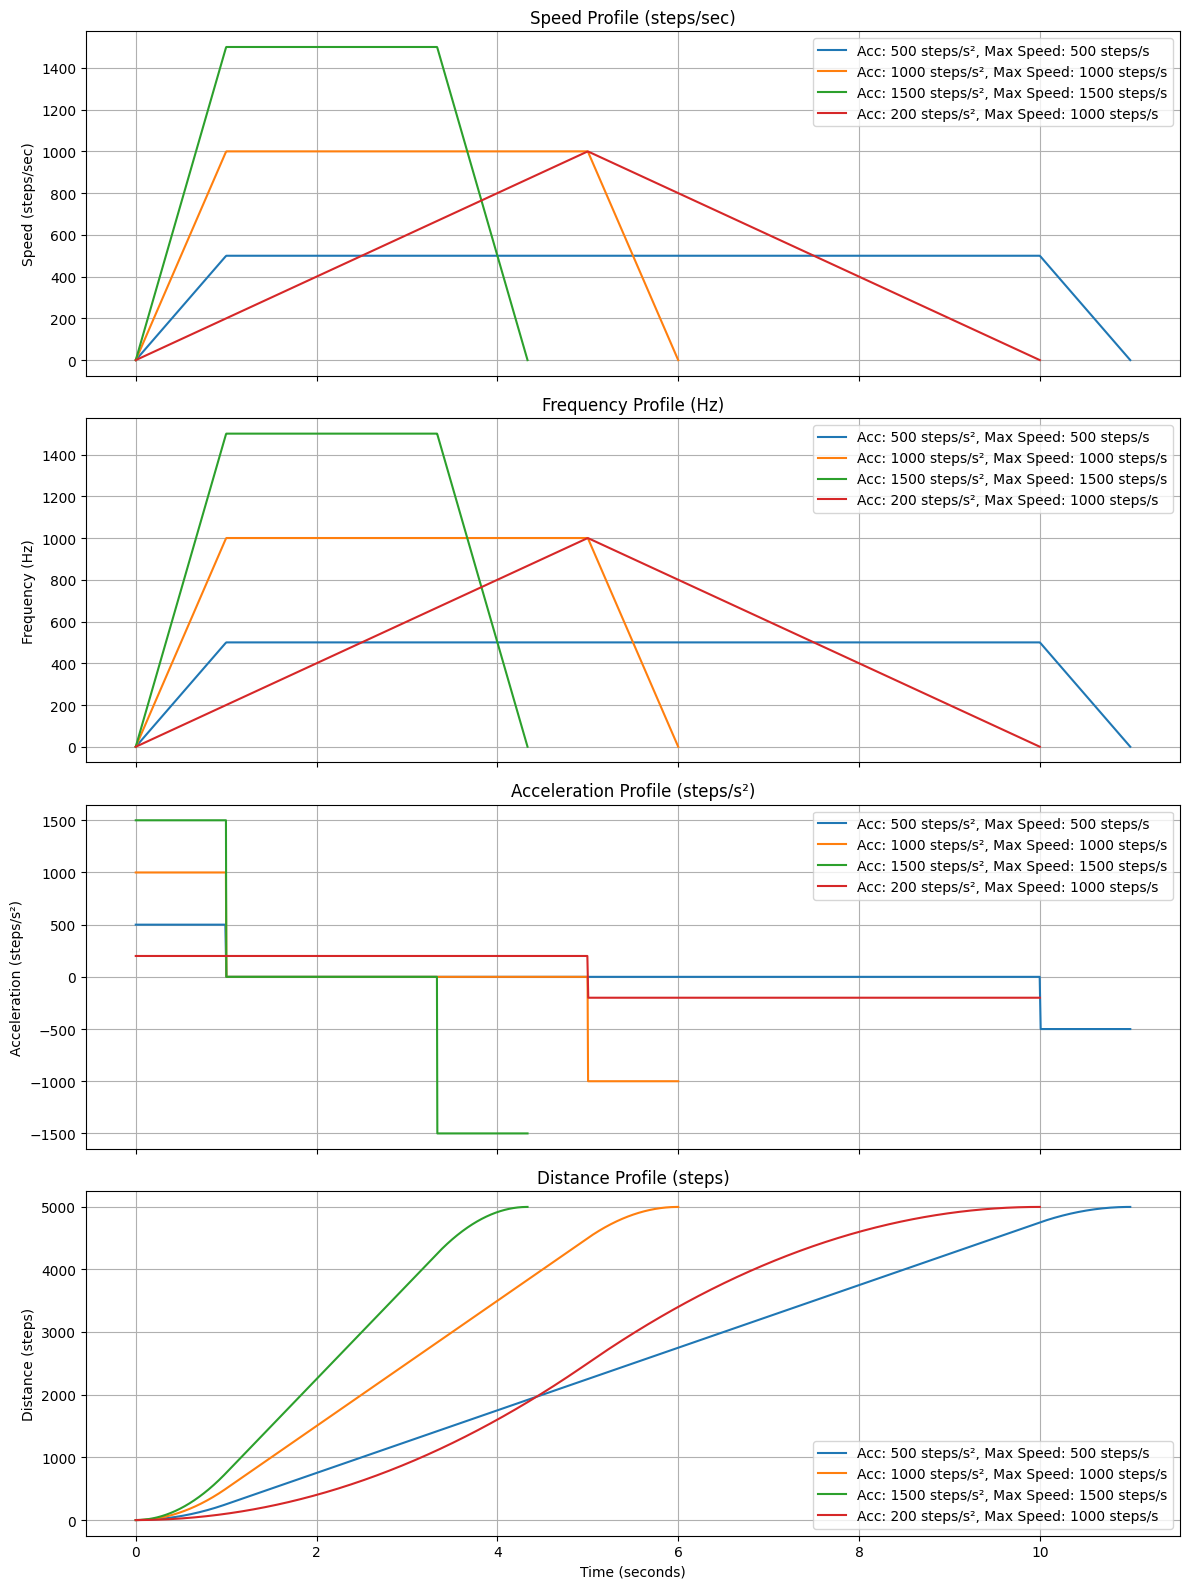


Profile: Acceleration = 500, Max Speed = 500
Acceleration Time: 1.00 seconds
Deceleration Time: 1.00 seconds
Time at Max Speed: 9.00 seconds
Total Time: 11.00 seconds
Distance during Acceleration: 250.00 steps
Distance during Deceleration: 250.00 steps
Distance at Max Speed: 4500.00 steps

Profile: Acceleration = 1000, Max Speed = 1000
Acceleration Time: 1.00 seconds
Deceleration Time: 1.00 seconds
Time at Max Speed: 4.00 seconds
Total Time: 6.00 seconds
Distance during Acceleration: 500.00 steps
Distance during Deceleration: 500.00 steps
Distance at Max Speed: 4000.00 steps

Profile: Acceleration = 1500, Max Speed = 1500
Acceleration Time: 1.00 seconds
Deceleration Time: 1.00 seconds
Time at Max Speed: 2.33 seconds
Total Time: 4.33 seconds
Distance during Acceleration: 750.00 steps
Distance during Deceleration: 750.00 steps
Distance at Max Speed: 3500.00 steps

Profile: Acceleration = 200, Max Speed = 1000
Acceleration Time: 5.00 seconds
Deceleration Time: 5.00 seconds
Time at Max Sp

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the simulation
max_steps = 5000  # Total steps the motor needs to travel
total_time = 0  # To be calculated later

# Define different acceleration and velocity values to compare
max_speeds = [500, 1000, 1500,1000]  # Maximum steps/s (frequency in Hz)
accelerations = [500, 1000, 1500,200]  # Steps/s²

# Plot setup
fig, axs = plt.subplots(4, 1, figsize=(12, 16), sharex=True)

# Iterate through different acceleration and velocity profiles
for acceleration, max_speed in zip(accelerations, max_speeds):
    # Calculate time to reach max speed using acceleration (t = v / a)
    acceleration_time = max_speed / acceleration
    deceleration_time = max_speed / acceleration  # Assuming deceleration equals acceleration
    
    # Distance covered during acceleration and deceleration
    distance_acceleration = 0.5 * acceleration * (acceleration_time ** 2)
    distance_deceleration = 0.5 * acceleration * (deceleration_time ** 2)
    distance_max_speed = max_steps - distance_acceleration - distance_deceleration

    if distance_max_speed < 0:
        # Adjust acceleration and deceleration times if max speed isn't reached
        acceleration_time = np.sqrt(max_steps / (0.5 * acceleration))
        deceleration_time = acceleration_time
        total_time = 2 * acceleration_time
        max_speed_time = 0
    else:
        max_speed_time = distance_max_speed / max_speed
        total_time = acceleration_time + max_speed_time + deceleration_time

    # Time array for simulation
    time = np.linspace(0, total_time, 1000)
    
    # Initialize profiles
    speed_profile = np.zeros_like(time)  # Steps/second
    frequency_profile = np.zeros_like(time)  # Hz (same as speed for simplicity)
    acceleration_profile = np.zeros_like(time)  # Steps/s²
    distance_profile = np.zeros_like(time)  # Distance in steps

    # Acceleration phase
    speed_profile[time <= acceleration_time] = acceleration * time[time <= acceleration_time]
    frequency_profile[time <= acceleration_time] = speed_profile[time <= acceleration_time]
    acceleration_profile[time <= acceleration_time] = acceleration

    # Constant speed phase
    speed_profile[(time > acceleration_time) & (time < (total_time - deceleration_time))] = max_speed
    frequency_profile[(time > acceleration_time) & (time < (total_time - deceleration_time))] = max_speed
    acceleration_profile[(time > acceleration_time) & (time < (total_time - deceleration_time))] = 0

    # Deceleration phase
    speed_profile[time >= (total_time - deceleration_time)] = max_speed - acceleration * (time[time >= (total_time - deceleration_time)] - (total_time - deceleration_time))
    frequency_profile[time >= (total_time - deceleration_time)] = speed_profile[time >= (total_time - deceleration_time)]
    acceleration_profile[time >= (total_time - deceleration_time)] = -acceleration

    # Calculate distance profile (cumulative distance)
    distance_profile = np.cumsum(speed_profile) * (total_time / len(time))

    # Plot profiles for this configuration
    label = f"Acc: {acceleration} steps/s², Max Speed: {max_speed} steps/s"
    axs[0].plot(time, speed_profile, label=label)
    axs[1].plot(time, frequency_profile, label=label)
    axs[2].plot(time, acceleration_profile, label=label)
    axs[3].plot(time, distance_profile, label=label)

# Set labels and legends
axs[0].set_title("Speed Profile (steps/sec)")
axs[0].set_ylabel("Speed (steps/sec)")
axs[0].legend()
axs[0].grid(True)

axs[1].set_title("Frequency Profile (Hz)")
axs[1].set_ylabel("Frequency (Hz)")
axs[1].legend()
axs[1].grid(True)

axs[2].set_title("Acceleration Profile (steps/s²)")
axs[2].set_ylabel("Acceleration (steps/s²)")
axs[2].legend()
axs[2].grid(True)

axs[3].set_title("Distance Profile (steps)")
axs[3].set_xlabel("Time (seconds)")
axs[3].set_ylabel("Distance (steps)")
axs[3].legend()
axs[3].grid(True)

plt.tight_layout()
plt.show()

# Output calculated times and distances for each profile
for acceleration, max_speed in zip(accelerations, max_speeds):
    acceleration_time = max_speed / acceleration
    deceleration_time = max_speed / acceleration
    distance_acceleration = 0.5 * acceleration * (acceleration_time ** 2)
    distance_deceleration = 0.5 * acceleration * (deceleration_time ** 2)
    distance_max_speed = max_steps - distance_acceleration - distance_deceleration
    if distance_max_speed < 0:
        acceleration_time = np.sqrt(max_steps / (0.5 * acceleration))
        deceleration_time = acceleration_time
        total_time = 2 * acceleration_time
        max_speed_time = 0
    else:
        max_speed_time = distance_max_speed / max_speed
        total_time = acceleration_time + max_speed_time + deceleration_time

    print(f"\nProfile: Acceleration = {acceleration}, Max Speed = {max_speed}")
    print(f"Acceleration Time: {acceleration_time:.2f} seconds")
    print(f"Deceleration Time: {deceleration_time:.2f} seconds")
    print(f"Time at Max Speed: {max_speed_time:.2f} seconds")
    print(f"Total Time: {total_time:.2f} seconds")
    print(f"Distance during Acceleration: {distance_acceleration:.2f} steps")
    print(f"Distance during Deceleration: {distance_deceleration:.2f} steps")
    print(f"Distance at Max Speed: {distance_max_speed:.2f} steps")


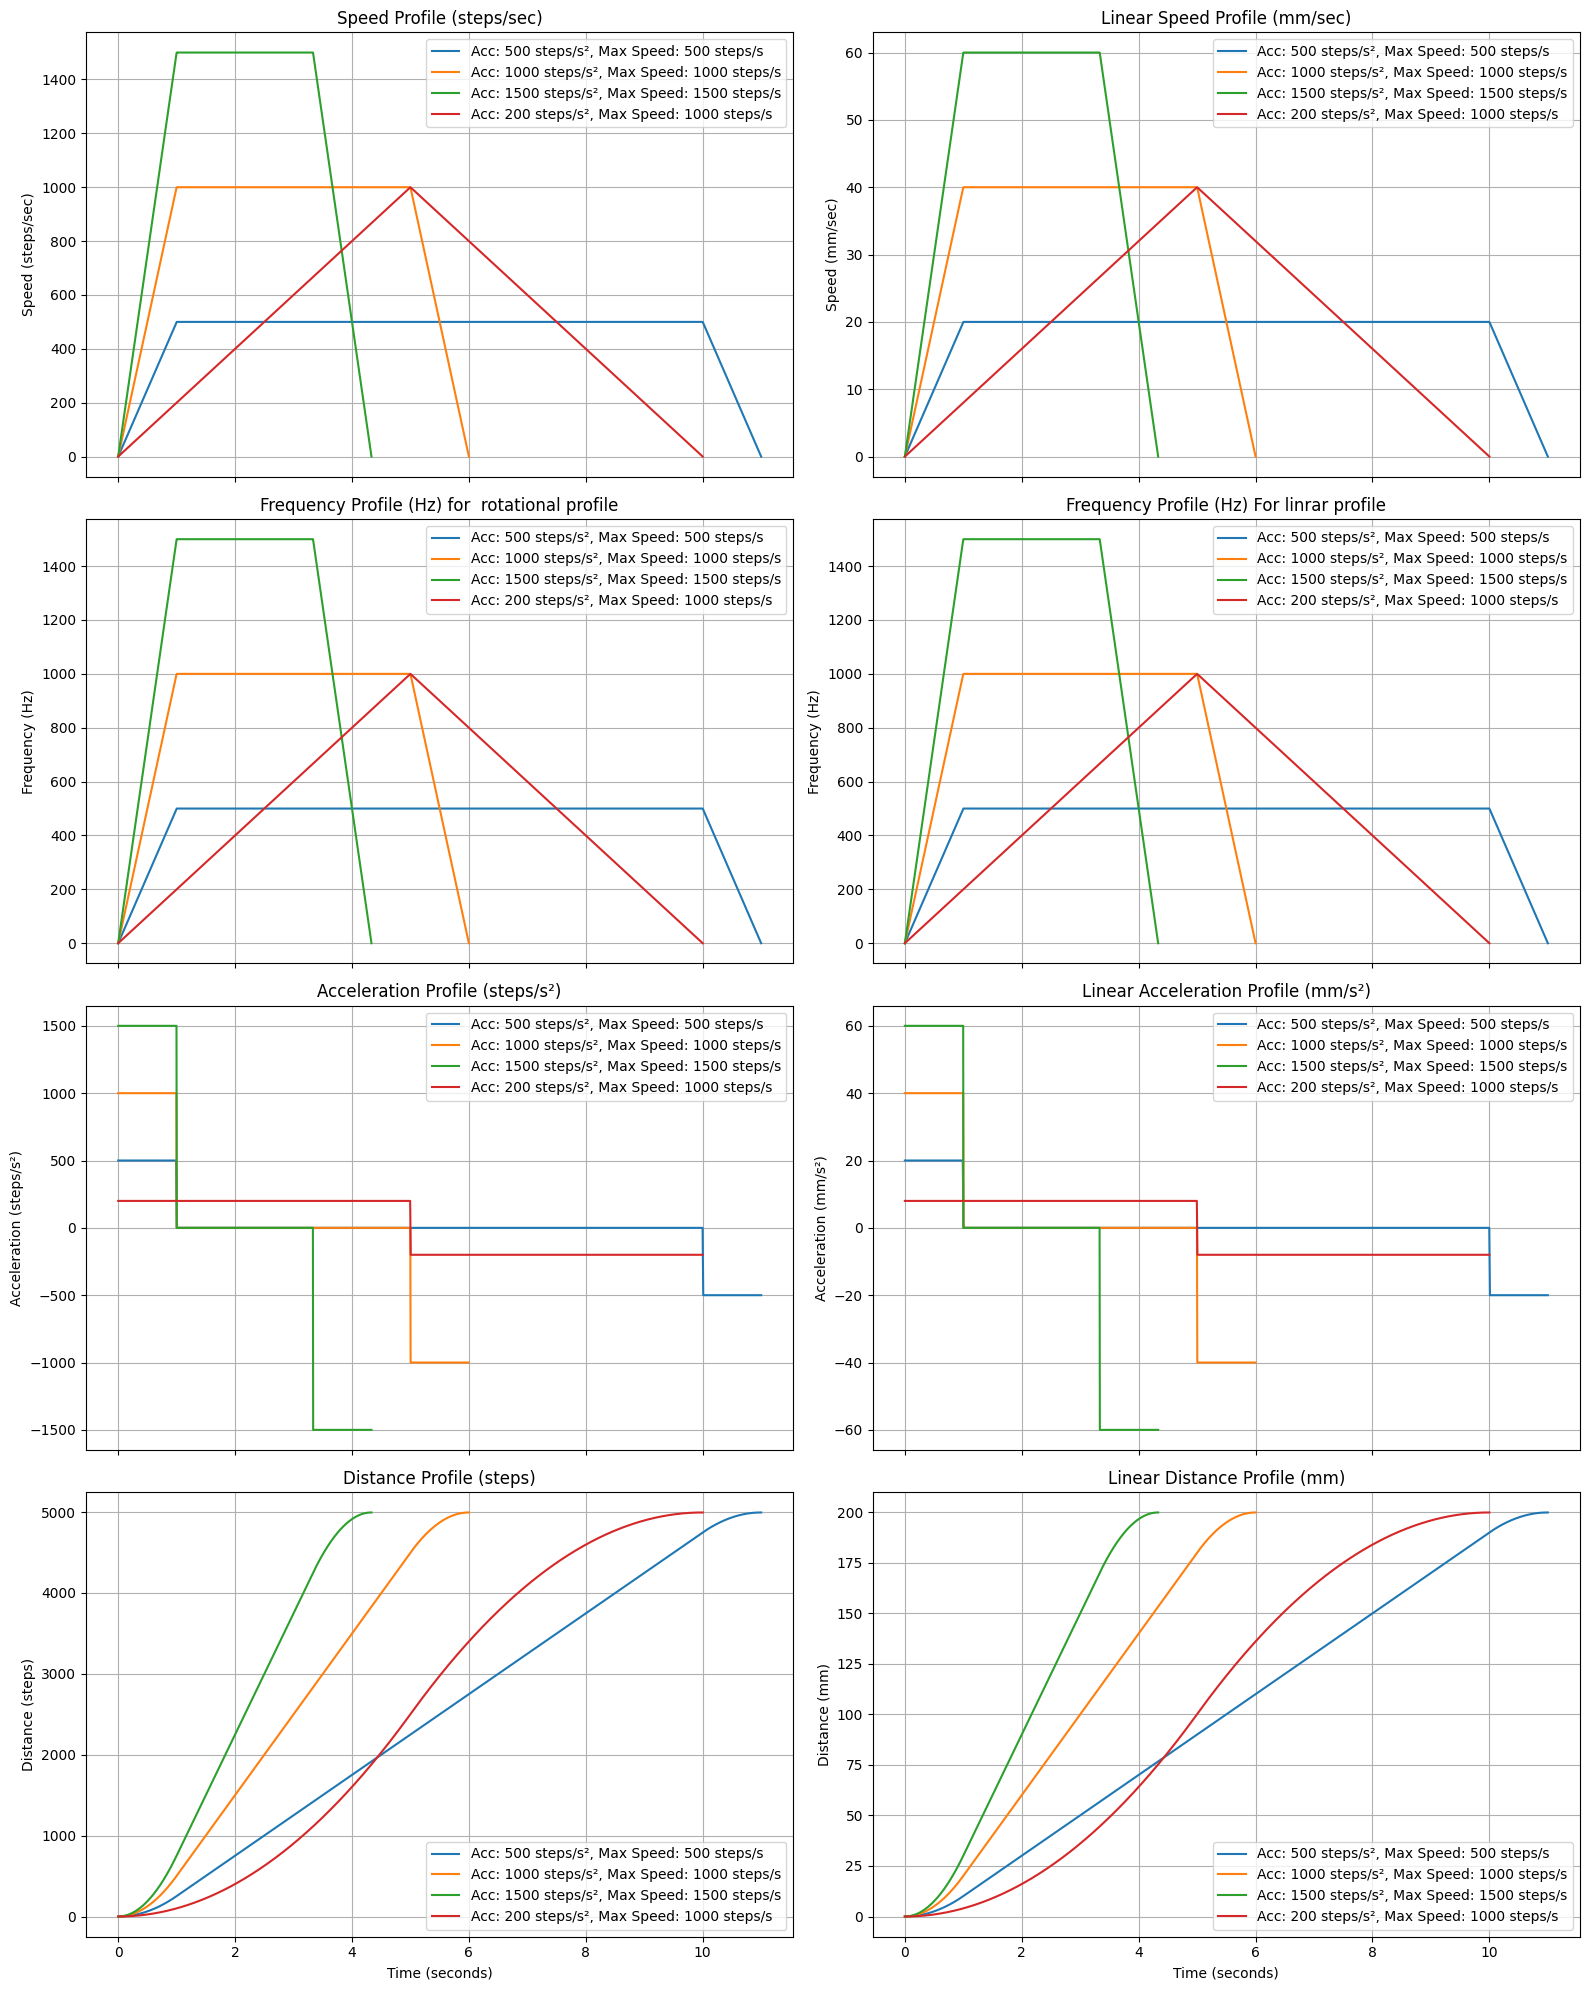

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the simulation
max_steps = 5000  # Total steps the motor needs to travel
total_time = 0  # To be calculated later
lead = 8  # Lead screw lead in mm
steps_per_revolution = 200  # Step resolution

# Define different acceleration and velocity values to compare
max_speeds = [500, 1000, 1500, 1000]  # Maximum steps/s (frequency in Hz)
accelerations = [500, 1000, 1500, 200]  # Steps/s²

# Plot setup
fig, axs = plt.subplots(4, 2, figsize=(16, 20), sharex=True)

# Iterate through different acceleration and velocity profiles
for acceleration, max_speed in zip(accelerations, max_speeds):
    # Calculate time to reach max speed using acceleration (t = v / a)
    acceleration_time = max_speed / acceleration
    deceleration_time = max_speed / acceleration  # Assuming deceleration equals acceleration

    # Distance covered during acceleration and deceleration
    distance_acceleration = 0.5 * acceleration * (acceleration_time ** 2)
    distance_deceleration = 0.5 * acceleration * (deceleration_time ** 2)
    distance_max_speed = max_steps - distance_acceleration - distance_deceleration

    if distance_max_speed < 0:
        # Adjust acceleration and deceleration times if max speed isn't reached
        acceleration_time = np.sqrt(max_steps / (0.5 * acceleration))
        deceleration_time = acceleration_time
        total_time = 2 * acceleration_time
        max_speed_time = 0
    else:
        max_speed_time = distance_max_speed / max_speed
        total_time = acceleration_time + max_speed_time + deceleration_time

    # Time array for simulation
    time = np.linspace(0, total_time, 1000)

    # Initialize profiles
    speed_profile = np.zeros_like(time)  # Steps/second
    frequency_profile = np.zeros_like(time)  # Hz (same as speed for simplicity)
    acceleration_profile = np.zeros_like(time)  # Steps/s²
    distance_profile = np.zeros_like(time)  # Distance in steps

    # Acceleration phase
    speed_profile[time <= acceleration_time] = acceleration * time[time <= acceleration_time]
    frequency_profile[time <= acceleration_time] = speed_profile[time <= acceleration_time]
    acceleration_profile[time <= acceleration_time] = acceleration

    # Constant speed phase
    speed_profile[(time > acceleration_time) & (time < (total_time - deceleration_time))] = max_speed
    frequency_profile[(time > acceleration_time) & (time < (total_time - deceleration_time))] = max_speed
    acceleration_profile[(time > acceleration_time) & (time < (total_time - deceleration_time))] = 0

    # Deceleration phase
    speed_profile[time >= (total_time - deceleration_time)] = max_speed - acceleration * (time[time >= (total_time - deceleration_time)] - (total_time - deceleration_time))
    frequency_profile[time >= (total_time - deceleration_time)] = speed_profile[time >= (total_time - deceleration_time)]
    acceleration_profile[time >= (total_time - deceleration_time)] = -acceleration

    # Calculate distance profile (cumulative distance)
    distance_profile = np.cumsum(speed_profile) * (total_time / len(time))

    # Convert to linear profiles
    linear_speed_profile = speed_profile * (lead / steps_per_revolution)
    linear_acceleration_profile = acceleration_profile * (lead / steps_per_revolution)
    linear_distance_profile = distance_profile * (lead / steps_per_revolution)

    # Plot rotational profiles for this configuration
    label = f"Acc: {acceleration} steps/s², Max Speed: {max_speed} steps/s"
    axs[0, 0].plot(time, speed_profile, label=label)
    axs[1, 0].plot(time, frequency_profile, label=label)
    axs[2, 0].plot(time, acceleration_profile, label=label)
    axs[3, 0].plot(time, distance_profile, label=label)

    # Plot linear profiles for this configuration
    axs[0, 1].plot(time, linear_speed_profile, label=label)
    axs[1, 1].plot(time, frequency_profile, label=label)
    axs[2, 1].plot(time, linear_acceleration_profile, label=label)
    axs[3, 1].plot(time, linear_distance_profile, label=label)

# Set labels and legends for rotational profiles
axs[0, 0].set_title("Speed Profile (steps/sec)")
axs[0, 0].set_ylabel("Speed (steps/sec)")
axs[0, 0].legend()
axs[0, 0].grid(True)

axs[1, 0].set_title("Frequency Profile (Hz) for  rotational profile")
axs[1, 0].set_ylabel("Frequency (Hz)")
axs[1, 0].legend()
axs[1, 0].grid(True)

axs[2, 0].set_title("Acceleration Profile (steps/s²)")
axs[2, 0].set_ylabel("Acceleration (steps/s²)")
axs[2, 0].legend()
axs[2, 0].grid(True)

axs[3, 0].set_title("Distance Profile (steps)")
axs[3, 0].set_xlabel("Time (seconds)")
axs[3, 0].set_ylabel("Distance (steps)")
axs[3, 0].legend()
axs[3, 0].grid(True)

# Set labels and legends for linear profiles
axs[0, 1].set_title("Linear Speed Profile (mm/sec)")
axs[0, 1].set_ylabel("Speed (mm/sec)")
axs[0, 1].legend()
axs[0, 1].grid(True)

axs[1, 1].set_title("Frequency Profile (Hz) For linrar profile")
axs[1, 1].set_ylabel("Frequency (Hz)")
axs[1, 1].legend()
axs[1, 1].grid(True)

axs[2, 1].set_title("Linear Acceleration Profile (mm/s²)")
axs[2, 1].set_ylabel("Acceleration (mm/s²)")
axs[2, 1].legend()
axs[2, 1].grid(True)

axs[3, 1].set_title("Linear Distance Profile (mm)")
axs[3, 1].set_xlabel("Time (seconds)")
axs[3, 1].set_ylabel("Distance (mm)")
axs[3, 1].legend()
axs[3, 1].grid(True)

plt.tight_layout()
plt.show()


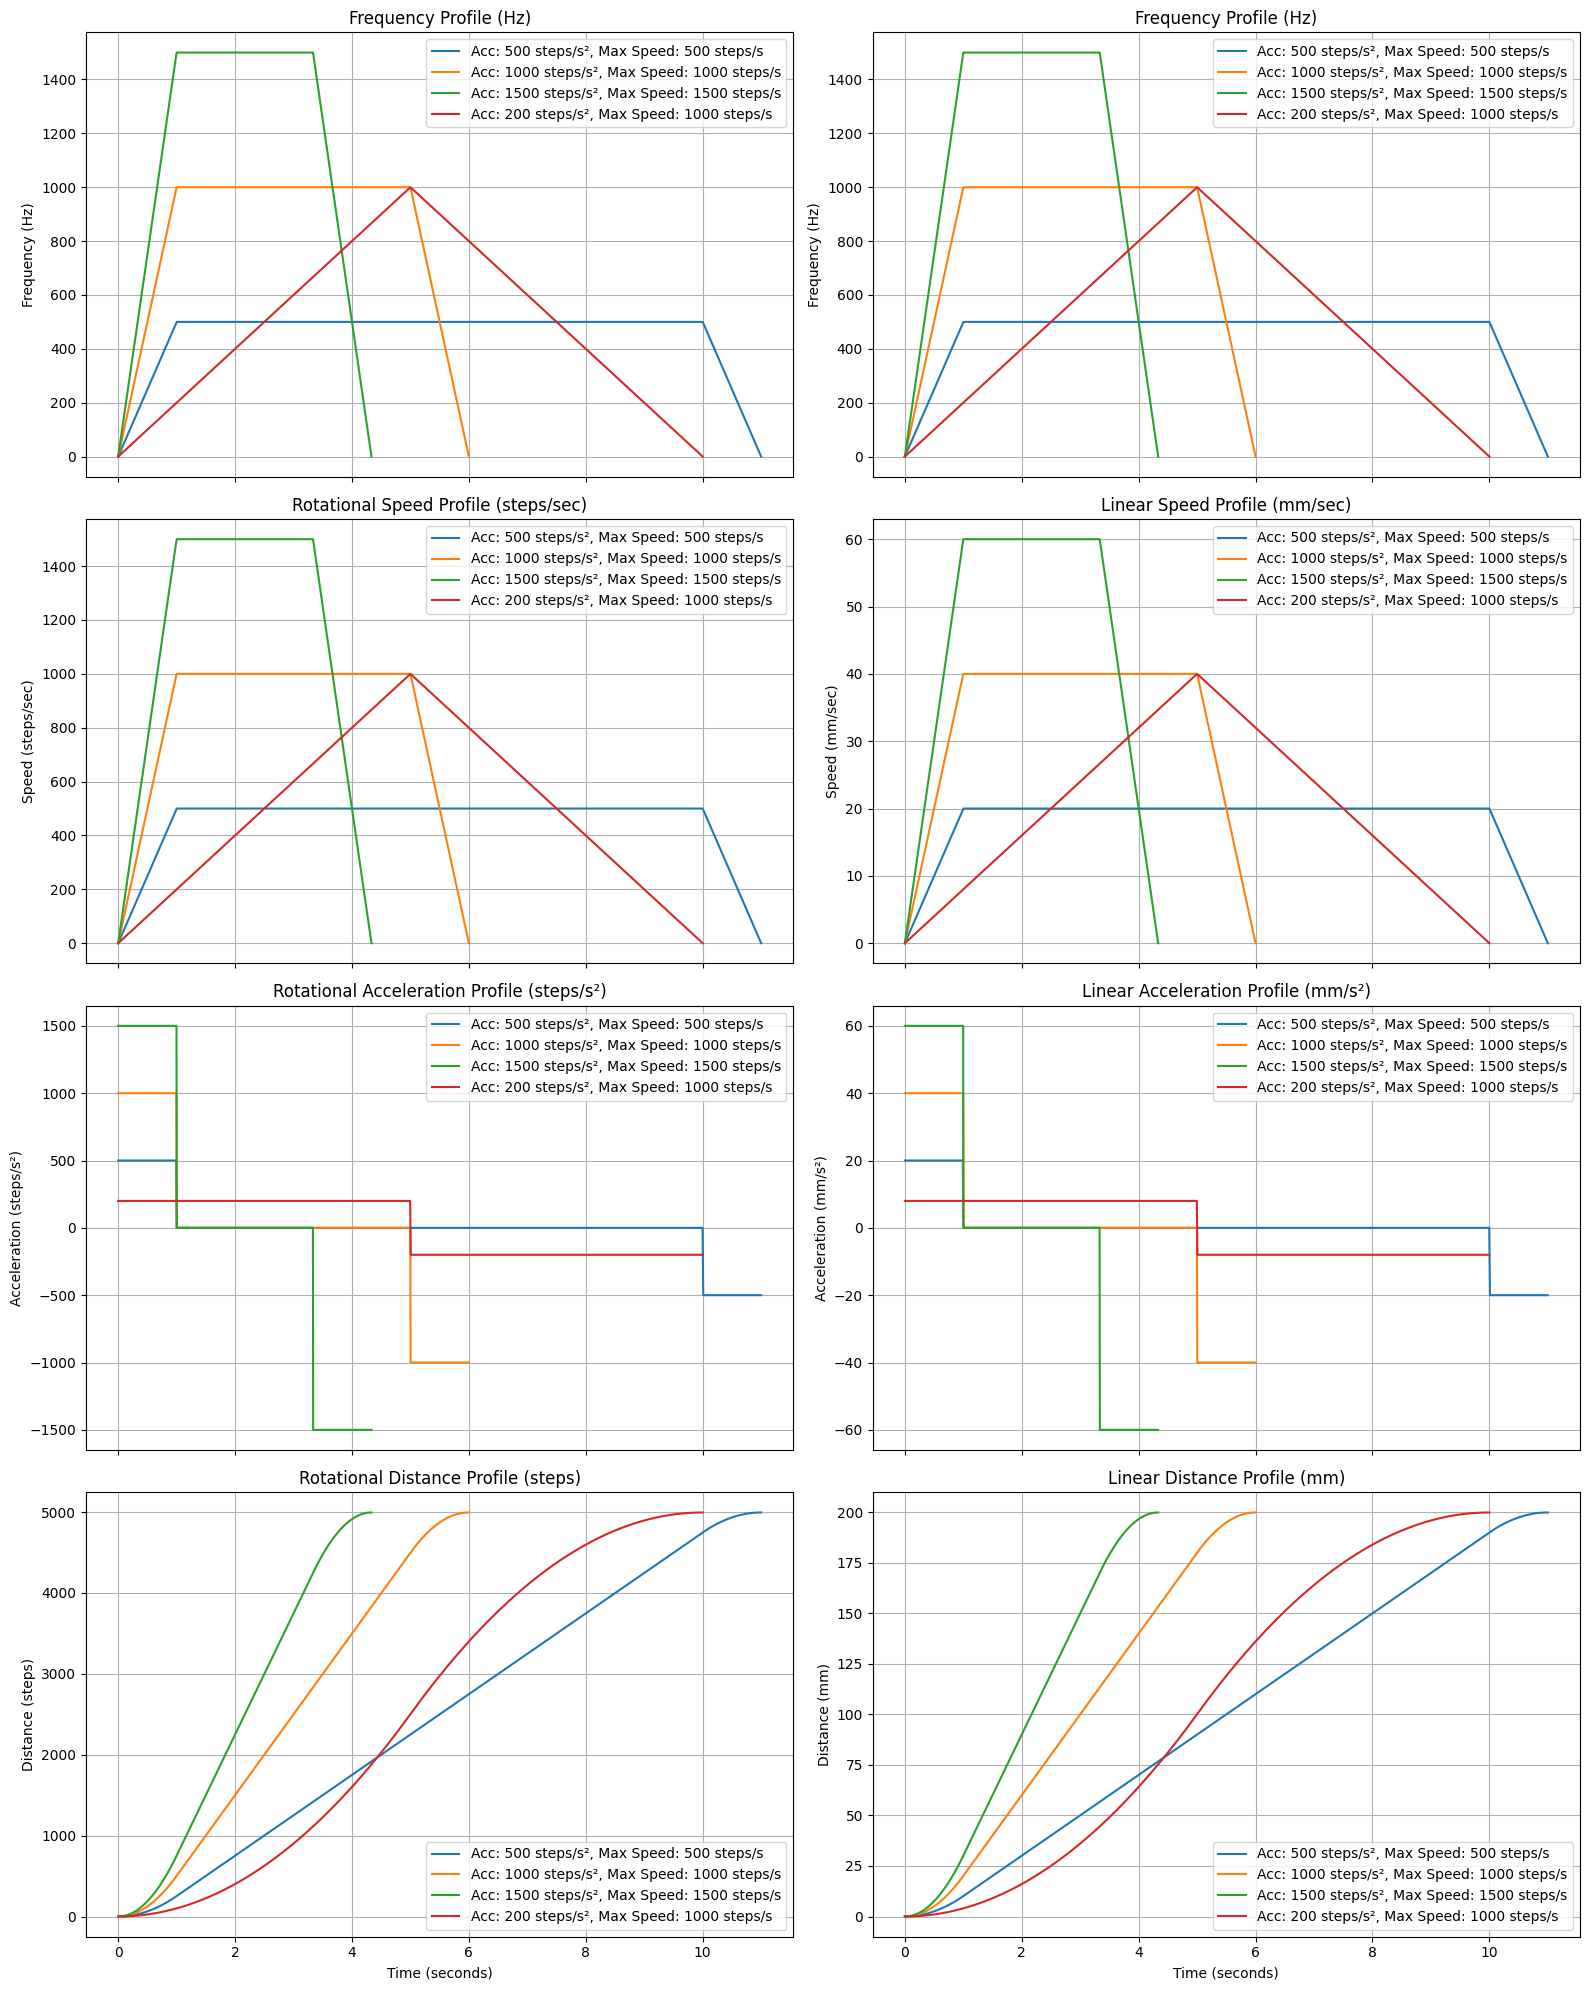

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the simulation
max_steps = 5000  # Total steps the motor needs to travel
lead = 8  # Lead screw lead in mm
steps_per_revolution = 200  # Step resolution (200 steps = 1 rotation)

# Define different acceleration and velocity values to compare
max_speeds = [500, 1000, 1500, 1000]  # Maximum steps/s (frequency in Hz)
accelerations = [500, 1000, 1500, 200]  # Steps/s²

# Plot setup
fig, axs = plt.subplots(4, 2, figsize=(16, 20), sharex=True)

# Iterate through different acceleration and velocity profiles
for acceleration, max_speed in zip(accelerations, max_speeds):
    # Calculate time to reach max speed using acceleration (t = v / a)
    acceleration_time = max_speed / acceleration
    deceleration_time = max_speed / acceleration  # Assuming deceleration equals acceleration

    # Distance covered during acceleration and deceleration
    distance_acceleration = 0.5 * acceleration * (acceleration_time ** 2)
    distance_deceleration = 0.5 * acceleration * (deceleration_time ** 2)
    distance_max_speed = max_steps - distance_acceleration - distance_deceleration

    if distance_max_speed < 0:
        # Adjust acceleration and deceleration times if max speed isn't reached
        acceleration_time = np.sqrt(max_steps / (0.5 * acceleration))
        deceleration_time = acceleration_time
        total_time = 2 * acceleration_time
        max_speed_time = 0
    else:
        max_speed_time = distance_max_speed / max_speed
        total_time = acceleration_time + max_speed_time + deceleration_time

    # Time array for simulation
    time = np.linspace(0, total_time, 1000)

    # Initialize profiles
    speed_profile = np.zeros_like(time)  # Steps/second
    frequency_profile = np.zeros_like(time)  # Hz (same as speed for simplicity)
    acceleration_profile = np.zeros_like(time)  # Steps/s²
    distance_profile = np.zeros_like(time)  # Distance in steps

    # Acceleration phase
    speed_profile[time <= acceleration_time] = acceleration * time[time <= acceleration_time]
    frequency_profile[time <= acceleration_time] = speed_profile[time <= acceleration_time]
    acceleration_profile[time <= acceleration_time] = acceleration

    # Constant speed phase
    speed_profile[(time > acceleration_time) & (time < (total_time - deceleration_time))] = max_speed
    frequency_profile[(time > acceleration_time) & (time < (total_time - deceleration_time))] = max_speed
    acceleration_profile[(time > acceleration_time) & (time < (total_time - deceleration_time))] = 0

    # Deceleration phase
    speed_profile[time >= (total_time - deceleration_time)] = max_speed - acceleration * (time[time >= (total_time - deceleration_time)] - (total_time - deceleration_time))
    frequency_profile[time >= (total_time - deceleration_time)] = speed_profile[time >= (total_time - deceleration_time)]
    acceleration_profile[time >= (total_time - deceleration_time)] = -acceleration

    # Calculate distance profile (cumulative distance)
    distance_profile = np.cumsum(speed_profile) * (total_time / len(time))

    # Convert to linear profiles
    linear_speed_profile = speed_profile * (lead / steps_per_revolution)
    linear_acceleration_profile = acceleration_profile * (lead / steps_per_revolution)
    linear_distance_profile = distance_profile * (lead / steps_per_revolution)

    # Plot rotational profiles for this configuration
    label = f"Acc: {acceleration} steps/s², Max Speed: {max_speed} steps/s"
    axs[0, 0].plot(time, frequency_profile, label=label)
    axs[1, 0].plot(time, speed_profile, label=label)
    axs[2, 0].plot(time, acceleration_profile, label=label)
    axs[3, 0].plot(time, distance_profile, label=label)

    # Plot linear profiles for this configuration
    axs[0, 1].plot(time, frequency_profile, label=label)
    axs[1, 1].plot(time, linear_speed_profile, label=label)
    axs[2, 1].plot(time, linear_acceleration_profile, label=label)
    axs[3, 1].plot(time, linear_distance_profile, label=label)

# Set labels and legends for rotational profiles
axs[0, 0].set_title("Frequency Profile (Hz)")
axs[0, 0].set_ylabel("Frequency (Hz)")
axs[0, 0].legend()
axs[0, 0].grid(True)

axs[1, 0].set_title("Rotational Speed Profile (steps/sec)")
axs[1, 0].set_ylabel("Speed (steps/sec)")
axs[1, 0].legend()
axs[1, 0].grid(True)

axs[2, 0].set_title("Rotational Acceleration Profile (steps/s²)")
axs[2, 0].set_ylabel("Acceleration (steps/s²)")
axs[2, 0].legend()
axs[2, 0].grid(True)

axs[3, 0].set_title("Rotational Distance Profile (steps)")
axs[3, 0].set_xlabel("Time (seconds)")
axs[3, 0].set_ylabel("Distance (steps)")
axs[3, 0].legend()
axs[3, 0].grid(True)

# Set labels and legends for linear profiles
axs[0, 1].set_title("Frequency Profile (Hz)")
axs[0, 1].set_ylabel("Frequency (Hz)")
axs[0, 1].legend()
axs[0, 1].grid(True)

axs[1, 1].set_title("Linear Speed Profile (mm/sec)")
axs[1, 1].set_ylabel("Speed (mm/sec)")
axs[1, 1].legend()
axs[1, 1].grid(True)

axs[2, 1].set_title("Linear Acceleration Profile (mm/s²)")
axs[2, 1].set_ylabel("Acceleration (mm/s²)")
axs[2, 1].legend()
axs[2, 1].grid(True)

axs[3, 1].set_title("Linear Distance Profile (mm)")
axs[3, 1].set_xlabel("Time (seconds)")
axs[3, 1].set_ylabel("Distance (mm)")
axs[3, 1].legend()
axs[3, 1].grid(True)

plt.tight_layout()
plt.show()


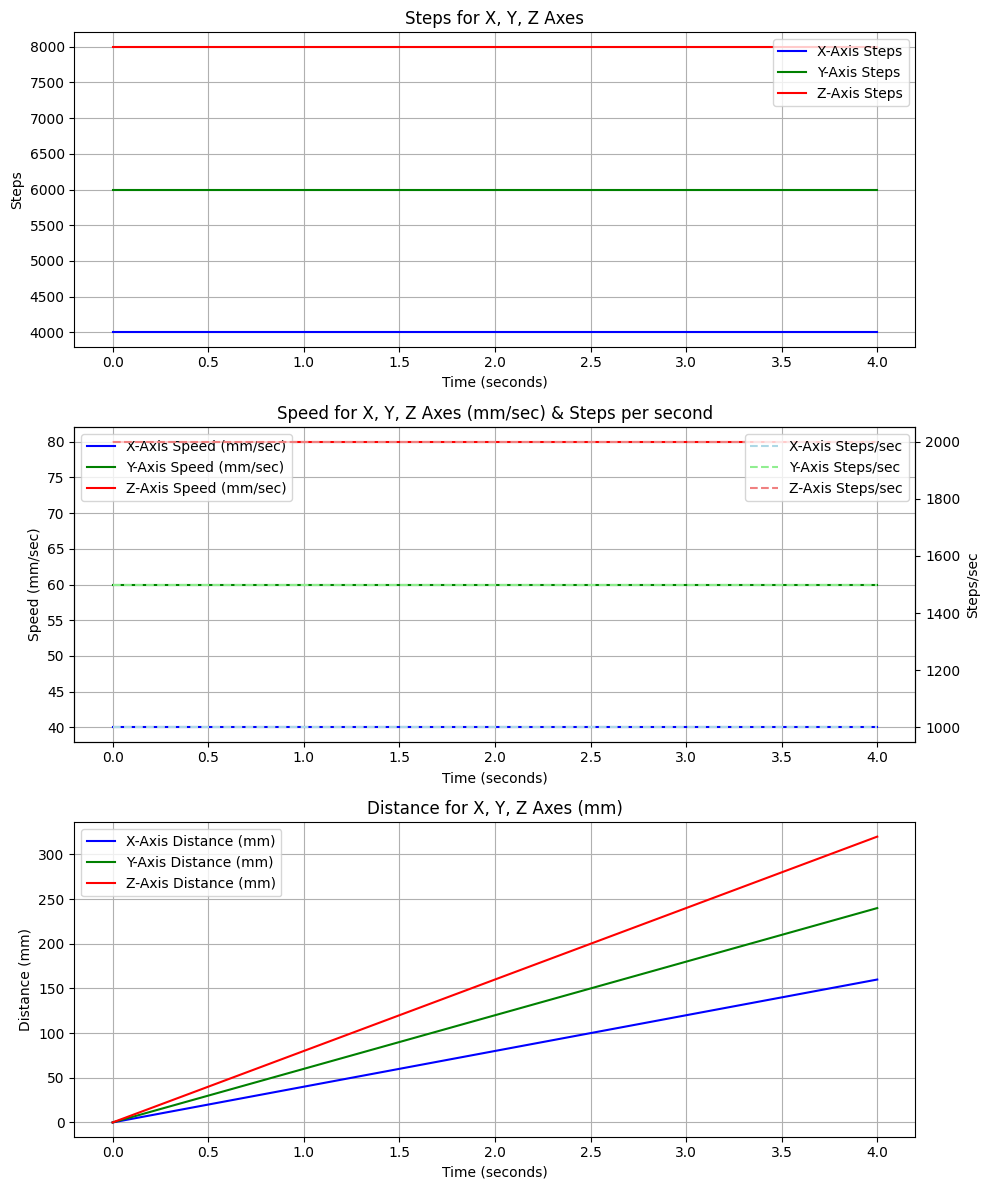

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the simulation
steps_per_revolution = 200  # Stepper motor steps per revolution
lead = 8  # Lead screw lead in mm (linear travel per revolution)

# Define steps for each axis
steps_x = 4000  # Total steps for X-axis
steps_y = 6000  # Total steps for Y-axis
steps_z = 8000  # Total steps for Z-axis

# Maximum speed (steps/sec) and acceleration (steps/sec^2)
max_speed = 2000  # Maximum speed in steps/sec

# Determine synchronization
max_steps = max(steps_x, steps_y, steps_z)  # Maximum steps across all axes
total_time = max_steps / max_speed  # Total time to complete motion at constant velocity

# Calculate scaled speeds for each axis to synchronize
speed_x = steps_x / total_time  # Speed required for X-axis
speed_y = steps_y / total_time  # Speed required for Y-axis
speed_z = steps_z / total_time  # Speed required for Z-axis

# Time array for simulation
time = np.linspace(0, total_time, 1000)

# Profiles
distance_x = speed_x * time  # Distance for X-axis
distance_y = speed_y * time  # Distance for Y-axis
distance_z = speed_z * time  # Distance for Z-axis

# Convert to linear units (mm)
linear_speed_x = speed_x * (lead / steps_per_revolution)
linear_speed_y = speed_y * (lead / steps_per_revolution)
linear_speed_z = speed_z * (lead / steps_per_revolution)

linear_distance_x = distance_x * (lead / steps_per_revolution)
linear_distance_y = distance_y * (lead / steps_per_revolution)
linear_distance_z = distance_z * (lead / steps_per_revolution)

# Calculate steps per second (steps/s) for each axis
steps_per_sec_x = np.ones_like(time) * speed_x
steps_per_sec_y = np.ones_like(time) * speed_y
steps_per_sec_z = np.ones_like(time) * speed_z

# Create figure for combined plots
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Plot Steps for X, Y, Z axes on the same graph
axs[0].plot(time, np.ones_like(time) * steps_x, label="X-Axis Steps", color='blue')
axs[0].plot(time, np.ones_like(time) * steps_y, label="Y-Axis Steps", color='green')
axs[0].plot(time, np.ones_like(time) * steps_z, label="Z-Axis Steps", color='red')
axs[0].set_title("Steps for X, Y, Z Axes")
axs[0].set_xlabel("Time (seconds)")
axs[0].set_ylabel("Steps")
axs[0].legend()
axs[0].grid(True)

# Plot Speed for X, Y, Z axes and Steps per second on the same graph
ax2 = axs[1].twinx()  # Create a second y-axis for steps per second
axs[1].plot(time, np.ones_like(time) * linear_speed_x, label="X-Axis Speed (mm/sec)", color='blue')
axs[1].plot(time, np.ones_like(time) * linear_speed_y, label="Y-Axis Speed (mm/sec)", color='green')
axs[1].plot(time, np.ones_like(time) * linear_speed_z, label="Z-Axis Speed (mm/sec)", color='red')

# Modified steps per second lines to avoid overlap by scaling down
ax2.plot(time, steps_per_sec_x * 1, label="X-Axis Steps/sec", color='lightblue', linestyle='--')
ax2.plot(time, steps_per_sec_y * 1, label="Y-Axis Steps/sec", color='lightgreen', linestyle='--')
ax2.plot(time, steps_per_sec_z * 1, label="Z-Axis Steps/sec", color='lightcoral', linestyle='--')

axs[1].set_title("Speed for X, Y, Z Axes (mm/sec) & Steps per second")
axs[1].set_xlabel("Time (seconds)")
axs[1].set_ylabel("Speed (mm/sec)")
ax2.set_ylabel("Steps/sec")  # Right y-axis label
axs[1].legend(loc="upper left")
ax2.legend(loc="upper right")
axs[1].grid(True)

# Plot Distance for X, Y, Z axes on the same graph
axs[2].plot(time, linear_distance_x, label="X-Axis Distance (mm)", color='blue')
axs[2].plot(time, linear_distance_y, label="Y-Axis Distance (mm)", color='green')
axs[2].plot(time, linear_distance_z, label="Z-Axis Distance (mm)", color='red')
axs[2].set_title("Distance for X, Y, Z Axes (mm)")
axs[2].set_xlabel("Time (seconds)")
axs[2].set_ylabel("Distance (mm)")
axs[2].legend()
axs[2].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()
